# Data Preparation 2

## Outliers

Outlier atau pencilan adalah data observasi yang muncul dengan nilai-nilai ekstrim baik ekstrim besar atau kecil. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Adanya outliers ini dapat berpengaruh pada hasil uji asumsi, seperti uji normalitas, lineraritas, maupun homogenitas varians. Lebih parah lagi, outliers ini dapat berpengaruh pada pegambilan kesimpulan penelitian dari hasil uji statistik. Ada beberapa faktor yang menyebabkan munculnya data outliers, diantaranya adalah:
1. Kesalahan penginputan data
2. Kesalahan pengambilan sampel
4. Fakta lapangan

In [36]:
import pandas as pd
import numpy as np

In [37]:
df=pd.read_csv("titanic dataset.csv")

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.shape

(891, 12)

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Mendeteksi outliers dengan boxplot

In [41]:
import seaborn as sns

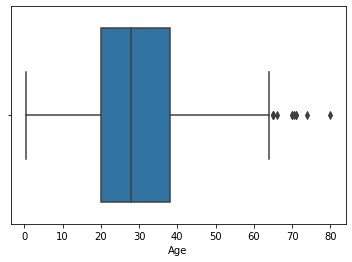

In [42]:
#mendeteksi outlier dari dataset kolom Age
sns.boxplot(x="Age", data=df)

## Mendeteksi outliers dengan IQR

IQR atau interquartile range adalah rentang kuartil dari sekumpulan data. IQR digunakan dalam analisis statistik untuk membantu menarik kesimpulan mengenai sekumpulan data.

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [44]:
#menampilkan outlier
low_out=df<(Q1 - 1.5 * IQR)
low_out

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
high_out=df>(Q3 + 1.5 * IQR)
high_out

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
#menghapus outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(PassengerId   -444.0000
 Survived        -1.5000
 Pclass           0.5000
 Age             -6.6875
 SibSp           -1.5000
 Parch            0.0000
 Fare           -26.7240
 dtype: float64,
 PassengerId    1336.0000
 Survived          2.5000
 Pclass            4.5000
 Age              64.8125
 SibSp             2.5000
 Parch             0.0000
 Fare             65.6344
 dtype: float64)

In [47]:
#menghapus outlier kolom Age
df_no_outlier = df[(df['Age'] > -6) & (df['Age'] < 65)]
df_no_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Scaling Data

Scaling data adalah teknik untuk mentransformasikan data mentah sebelum data dianalisis agar data lebih siap dianalisis.

Contoh: akan terjadi bias, apabila salah satu variabel data memiliki nilai bervariasi dari 0 hingga 10.000, sedangkan variabel lainnya memiliki variasi nilai dari 0 hingga 1

In [48]:
from sklearn import datasets
from sklearn import preprocessing

In [49]:
#memeriksa dataset yang tersedia di modul
datasets.*?
datasets.load_*?

In [50]:
#mengambil dataset Boston
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Scaling data menjadi standard normal

Metode scaling data menggunakan standard normal (z-score), dengan menetapkan mean 0 dan standard deviation 1. 

In [51]:
#definisikan variabel sebagai X, dan target sebagai y
X, y=boston.data, boston.target

In [52]:
X[:, :3].mean(axis=0) #mean 3 variabel pertama

array([ 3.61352356, 11.36363636, 11.13677866])

In [53]:
X[:, :3].std(axis=0) #standar deviasi 3 variabel pertama

array([ 8.59304135, 23.29939569,  6.85357058])

In [54]:
X_2 = preprocessing.scale(X[:, :3]) #preprocessing dengan scaling data

In [55]:
X_2.mean(axis=0) #mean setelah scaling

array([-8.78743718e-17, -6.34319123e-16, -2.68291099e-15])

In [56]:
X_2.std(axis=0) #standar deviasi setelah scaling

array([1., 1., 1.])

### Scaling data dengan MinMaxScaler

Min-Max Scaling bekerja dengan scaling data/menyesuaikan data dalam rentang/range tertentu (range nilai minimum hingga nilai maksimum), dengan rentang yang biasa digunakan adalah 0 hingga 1.

In [57]:
min_max_scaler = preprocessing.MinMaxScaler() #inisialisasi normalisasi MinMax

In [58]:
min_max_scaler.fit(X[:, :3]) #scaling 3 variabel pertama

MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
min_max_scaler.transform(X[:, :3]).min(axis=0) #min setelah scaling

array([0., 0., 0.])

In [60]:
min_max_scaler.transform(X[:, :3]).max(axis=0) #max setelah scaling

array([1., 1., 1.])

In [61]:
min_max_scaler.transform(X[:, :3]).mean(axis=0) #mean setelah scaling

array([0.0405441 , 0.11363636, 0.39137752])

In [62]:
min_max_scaler.transform(X[:, :3]).std(axis=0) #standar deviasi setelah scaling

array([0.09658371, 0.23299396, 0.25123059])

## Cross Tabulation

Tabulasi silang atau crosstabs merupakan salah satu analisis korelasional yang digunakan untuk melihat hubungan antarvariabel (minimal 2 variabel) kategori nominal atau ordinal.

In [63]:
data={
    'Jenis Kelamin':['Laki-laki']*2+['Perempuan']*2+['Laki-laki','Perempuan']
    +['Laki-laki']*3+['Perempuan'],
    'Persentase Kerja':['Rendah','Sedang','Tinggi']*3+['Sedang']
}

In [64]:
df=pd.DataFrame(data,
               index=pd.Index(['1','2','3','4','5','6','7','8','9','10']),
               columns=pd.Index(['Jenis Kelamin','Persentase Kerja']))
df

,Jenis Kelamin,Persentase Kerja
1,Laki-laki,Rendah
2,Laki-laki,Sedang
3,Perempuan,Tinggi
4,Perempuan,Rendah
5,Laki-laki,Sedang
6,Perempuan,Tinggi
7,Laki-laki,Rendah
8,Laki-laki,Sedang
9,Laki-laki,Tinggi
10,Perempuan,Sedang


In [65]:
df_baru= pd.crosstab(df['Jenis Kelamin'],df['Persentase Kerja'],margins=True)
df_baru

Persentase Kerja,Rendah,Sedang,Tinggi,All
Jenis Kelamin,,,,
Laki-laki,2,3,1,6
Perempuan,1,1,2,4
All,3,4,3,10


### Operasi dalam Matriks

In [66]:
dat=[4,6,8,12]
dat1=[3,6,8,1]

In [68]:
dat

[4, 6, 8, 12]

In [67]:
mat=np.array(dat)
mat1=np.array(dat1)

In [69]:
mat

array([ 4,  6,  8, 12])

In [70]:
#mengubah bentuk matriks
matriks=mat.reshape(2,2)
matriks

array([[ 4,  6],
       [ 8, 12]])

In [71]:
matriks1=mat1.reshape(2,2)
matriks1

array([[3, 6],
       [8, 1]])

In [72]:
#penjumlahan
a=matriks+matriks1 
a

array([[ 7, 12],
       [16, 13]])

In [73]:
##perkalian
x=matriks.dot(matriks1)
x

array([[ 60,  30],
       [120,  60]])

In [74]:
np.trace(matriks) ##menjumlahkan diagonal matriks

16

In [75]:
matriks.T ##matriks transpose

array([[ 4,  8],
       [ 6, 12]])

In [76]:
from numpy.linalg import det,inv,qr

In [77]:
det(matriks) ##determinan

0.0

In [79]:
qr(matriks) #dekomposisi

(array([[-0.4472136 , -0.89442719],
        [-0.89442719,  0.4472136 ]]),
 array([[-8.94427191e+00, -1.34164079e+01],
        [ 0.00000000e+00,  3.55271368e-15]]))

In [80]:
det(matriks1)

-44.99999999999999

In [81]:
inv(matriks1) #invers

array([[-0.02222222,  0.13333333],
       [ 0.17777778, -0.06666667]])

In [82]:
qr(matriks1)

(array([[-0.35112344, -0.93632918],
        [-0.93632918,  0.35112344]]),
 array([[-8.54400375, -3.04306983],
        [ 0.        , -5.26685162]]))